SIN J Component 

Shreya Rastogi   19BCE0756 <br>
Harshvardhan Mishra  19BCB0125 <br>
Shayam Ranjan Bharti    19BCE0784 <br> 

To import the dataset from drive, we needs to mount the drive. Following code performs this task.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing used libraries for this social network graph study
import networkx as nx
import matplotlib.pyplot as plt
import csv
import random
import matplotlib.colors as mcolors
import random
import pandas as pd
import datetime
import io
import array,re,itertools
import numpy as np
import math

In [ ]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

### Data Preprocessing

* Importing Datasets and describing them. 
* Working appropriate centrality measures, clustering coefficients (both local and global) and reciprocity and transitivity. 
* Inferences from the output of above values.


#### Description of Datasets:

### [Patent citation network]https://snap.stanford.edu/data/ego-Twitter.html)

**Dataset information** :<br>
This dataset consists of 'circles' (or 'lists') from Twitter. Twitter data was crawled from public sources. The dataset includes node features (profiles), circles, and ego networks.
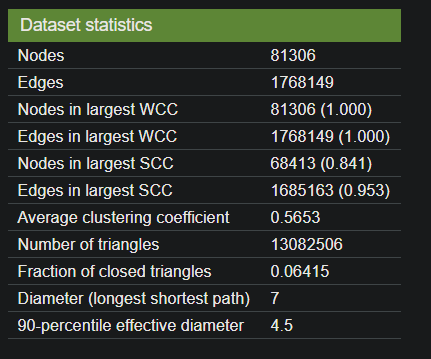

### [Social circles: Facebook](https://snap.stanford.edu/data/ego-Facebook.html)
**Dataset information** : <br>
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent.
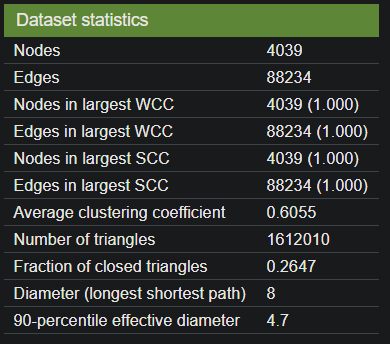

In [ ]:
# Taking Twitter Dataset in graph and displaying it's features.
g_cp = nx.read_edgelist('/content/drive/My Drive/Colab Notebooks/Dataset/twitter_combined.txt', nodetype=int, create_using=nx.DiGraph())
print (nx.info(g_cp))

In [ ]:
from networkx.algorithms import bipartite
print("Is Biparted? ")
print(bipartite.is_bipartite(g_cp))

Is Biparted? 
False


In [ ]:
# Sampling Social Circles Facebook Dataset
result = []
f = open('/content/drive/MyDrive/twitter_combined_Sample.txt', "w")
with open('/content/drive/MyDrive/twitter_combined.txt') as fh:
    data = fh.readlines()
    for line in data:
        if line:
            words = line.split()
            result.append(words)
sample = random.sample(result, 20000)

for item in sample:
    f.write(item[0] + "\t" + item[1] + "\n")
print ("Sampled Dataset Information:")
g_sampled = nx.read_edgelist('/content/drive/MyDrive/twitter_combined_Sample.txt', nodetype=int, create_using=nx.DiGraph())
print (nx.info(g_sampled))

Sampled Dataset Information:
Name: 
Type: DiGraph
Number of nodes: 18923
Number of edges: 18627
Average in degree:   0.9844
Average out degree:   0.9844


In [ ]:
from networkx.algorithms import bipartite
print("Is Biparted? ")
print(bipartite.is_bipartite(g_sampled))

Is Biparted?
True


Reading Facebook Social Circle Dataset and displaying it's features.

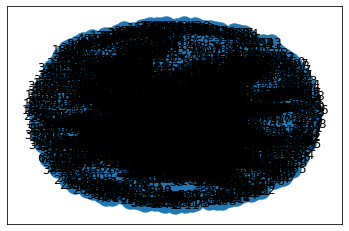

In [ ]:
nx.draw_networkx(g_fb)

In [ ]:
# Sampling Social Circles Facebook Dataset
result = []
F = open('//content/drive/MyDrive/facebook_combined_Sample.txt', "w")
with open('/content/drive/MyDrive/facebook_combined.txt') as fh:
    data = fh.readlines()
    for line in data:
        if line:
            words = line.split()
            result.append(words)
sample = random.sample(result, 20000)

for item in sample:
    F.write(item[0] + "\t" + item[1] + "\n")
print ("Sampled Dataset Information:")
G_sampled = nx.read_edgelist('/content/drive/MyDrive/facebook_combined.Sample.txt', nodetype=int, create_using=nx.DiGraph())
print (nx.info(G_sampled))

Sampled Dataset Information:
Name: 
Type: DiGraph
Number of nodes: 3668
Number of edges: 17785
Average in degree:   4.8487
Average out degree:   4.8487


Working on centrality measures, clustering coefficients on samples for both datasets.

In [ ]:
# Twitter Dataset Sample
pos = nx.spring_layout(g_sampled)
# Degree Centrality
degCent = nx.degree_centrality(g_sampled)
# Betweeness Centrality
betCent = nx.betweenness_centrality(g_sampled, normalized=True, endpoints=True)
#eigen vector centrality
eig_cen=nx.eigenvector_centrality(g_sampled,1000000) # 1000000-->precision
key_max = max(eig_cen.keys(), key=(lambda k: eig_cen[k]))
print('Maximum eigen-vector centrality:',eig_cen[key_max],end=" ")
print('at node =',key_max)
# Katz centrality
l=nx.katz_centrality(g_sampled, alpha=0.1, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)
l_max = max(l.keys(), key=(lambda k: l[k]))
print('Maximum Katz centrality:',l[l_max],end=" ")
print('at node =',l_max)


# Clustering Coeficients
print("Clustering Coefficient of Sample (GLobal)")
cc1_sampled = nx.average_clustering(g_sampled)
print (cc1_sampled)
#print("Clustering Coefficient of Sample (Local)")
c1_sampled = nx.clustering(g_sampled)
#print (c1_sampled)
print ("Reciprocity of Sample")
r = nx.overall_reciprocity(g_sampled)
print(r)
print ("Transitivity of Sample")
t = nx.transitivity(g_sampled)
print(t)


Maximum eigen-vector centrality: 0.3966795593283609 at node = 34428380
Maximum Katz centrality: 0.09982299190273909 at node = 34428380
Clustering Coefficient of Sample (GLobal)
0.00324911491381898
Reciprocity of Sample
0.011843876177658143
Transitivity of Sample
0.016179304091578826


In [ ]:
# Social Circles Facebook Dataset Sample
pos = nx.spring_layout(G_sampled)
# Degree Centrality
degCent = nx.degree_centrality(G_sampled)
# Betweeness Centrality
betCent = nx.betweenness_centrality(G_sampl ed, normalized=True, endpoints=True)
# Eigen vector centrality
eig_cen=nx.eigenvector_centrality(G_sampled,1000000) # 1000000-->precision
key_max = max(eig_cen.keys(), key=(lambda k: eig_cen[k]))
print('Maximum eigen-vector centrality:',eig_cen[key_max],end=" ")
print('at node =',key_max)
# Katz centrality
l=nx.katz_centrality(G_sampled, alpha=0.1, beta=1.0, max_iter=1000, tol=1.0e-6, nstart=None, normalized=True, weight=None)
l_max = max(l.keys(), key=(lambda k: l[k]))
print('Maximum Katz centrality:',l[l_max],end=" ")
print('at node =',l_max)

# Clustering Coefficients
print("Clustering Coefficient of Sample (GLobal)")
cc1_sampled = nx.average_clustering(G_sampled)
print (cc1_sampled)
#print("Clustering Coefficient of Sample (Local)")
c1_sampled = nx.clustering(G_sampled)
#print (c1_sampled)
# Reciprocity and Transitivity
print ("Reciprocity of Facebook Sample")
r = nx.overall_reciprocity(G_sampled)
print(r)
print ("Transitivity of Facebook Sample")
t = nx.transitivity(G_sampled)
print(t)

Maximum eigen-vector centrality: 0.9345366326699236 at node = 2654
Maximum Katz centrality: 0.15645060788658288 at node = 2654
Clustering Coefficient of Sample (GLobal)
0.048300243815757087
Reciprocity of Facebook Sample
0.0
Transitivity of Facebook Sample
0.04007785985226592


Identifing nodes with maximum in-degrees and list of some nodes with their in-degrees for both dataset samples.

In [ ]:
# Twitter Dataset Sample
dicta = g_sampled.in_degree()
print("The nodes with maximum in-degree are :")
i = max(nx.in_degree_centrality(g_sampled),key=(nx.in_degree_centrality(g_sampled)).get)
val = dicta[i]
print("Node   inDegree")
for p,r in dicta:
    if(r == val):
        print(str(p) + "\t" + str(r))
print(" ")
print("List of some nodes with their in-degree:")
w = 1
for p,r in dicta:
    if(w <= 5):
        print(str(p) + "\t" + str(r))
        w = w+1

The nodes with maximum in-degree are :
Node   inDegree
22462180	60
 
List of some nodes with their in-degree:
6608332	4
146540920	3
281051529	0
498037630	1
5747502	1


In [ ]:
# Social Circles Facebook Dataset Sample
dict1 = G_sampled.in_degree()
print("The nodes with maximum in-degree are :")
i = max(nx.in_degree_centrality(G_sampled),key=(nx.in_degree_centrality(G_sampled)).get)
val = dict1[i]

print("Node   inDegree")
for p,r in dict1:
    if(r == val):
        print(str(p) + "\t" + str(r))
print(" ")
print("List of some nodes with their in-degree:")
w = 1
for p,r in dict1:
    if(w <= 5):
        print(str(p) + "\t" + str(r))
        w = w+1

The nodes with maximum in-degree are :
Node   inDegree
2543	63
 
List of some nodes with their in-degree:
107	0
1715	10
1284	3
1298	7
2247	15


Showing Degree Distribution and Log Degree Distribution for both dataset samples.

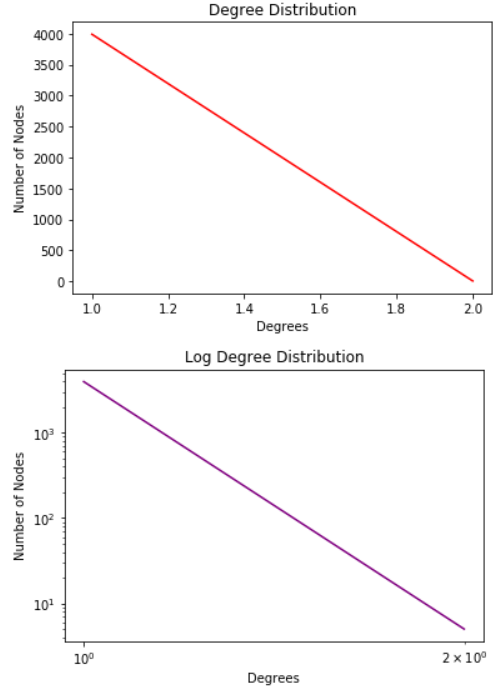

In [ ]:
# Twitter Dataset Sample
da = dict()
for xa,ya in nx.degree(g_sampled):
    if(ya not in da):
        da[ya]=1
    else:
        da[ya]+=1
plt.plot(da.keys(),da.values(),"red")
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()
plt.loglog(da.keys(),da.values(),"purple")
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Log Degree Distribution")
plt.show()

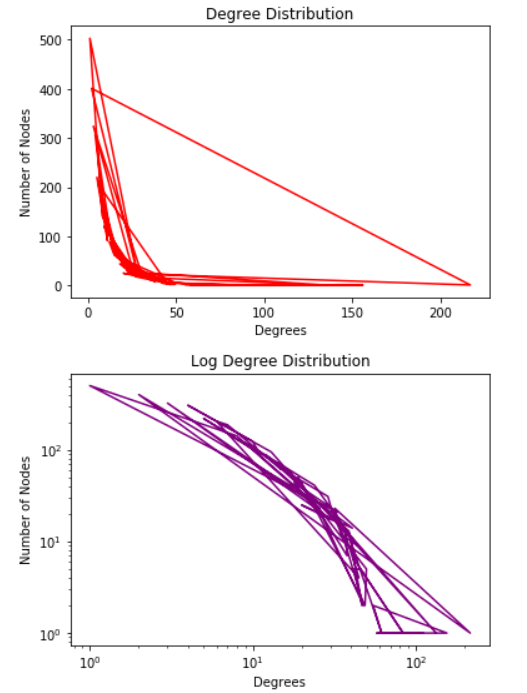

In [ ]:
# Social Circles facebook Dataset sample
d = dict()
for x,y in nx.degree(G_sampled):
    if(y not in d):
        d[y]=1
    else:
        d[y]+=1
plt.plot(d.keys(),d.values(),"red")
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()
plt.loglog(d.keys(),d.values(),"purple")
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Log Degree Distribution")
plt.show()

## Inference
Both the dataset graph contains number of edges low as compared to general graph. That means both graph have low density. <br>
Dataset 1: <br>
Type: DiGraph
Nodes	81306<br>
Edges	1768149<br>
Average in degree:   4.3761 <br>
Average out degree:   4.3761 <br>
Dataset 2: <br>
Type: Graph <br>
Number of nodes: 4039 <br>
Number of edges: 88234 <br>
Average degree:  43.6910 <br>
For each dataset, we have plotted degree distribution and log distribution, from that we come to a conclusion that both directed graphs have many nodes with very less degrees.


For studing these directed graphs, Firstly we have made simple random sample from given dataset and then we calculated Degree Centrality, Eigen vector centrality, Katz centrality and Betweenness Centrality. Moreover, we have calculated Clustering Coefficient (both local and global), Reciprocity and Transitivity for each graph which can be seen above.

Using above plots, we have identified hubs in these real graphs. Hubs are the nodes which are less in number but have high degrees.


















In [ ]:
# Social Circle Facebook Dataset Sample (Information Cascading effect)
print (nx.info(G_sampled))

Name: 
Type: DiGraph
Number of nodes: 3693
Number of edges: 17773
Average in degree:   4.8126
Average out degree:   4.8126


An information cascade is defined as a piece of information
or decision being cascaded among a set of individuals, where 
- individuals are connected by a network and 
- individuals are only observing decisions of their immediate neighbors (friends).

The **independent cascade model (ICM)** that can be utilized to model information cascades. Variants of this model
have been discussed in the literature. 
Below assumptions for this model include the
following:
- The network is represented using a directed graph. Nodes are actors
and edges depict the communication channels between them. A
node can only influence nodes that it is connected to.
- Decisions are binary – nodes can be either active or inactive. An active
nodes means that the node decided to adopt the behavior, innovation,
or decision.
- A node, once activated, can activate its neighboring nodes.
- Activation is a progressive process, where nodes change from inactive
to active, but not vice versa.

Reuirements :
- Diffusion graph G(V, E), set of initial activated nodes A(0) , activation probabilities P v,w

In [ ]:
initial_activated_nodes = random.randint(1,500)
nodes = list(G_sampled.nodes)
print(initial_activated_nodes)

257


Set of initial activated nodes is mentioned below:-

In [ ]:
activated_nodes = set()
while(len(activated_nodes) != initial_activated_nodes):
    rand_idx = random.randint(1,300)
    activated_nodes.add(nodes[rand_idx-1])
print(activated_nodes)

{1024, 3584, 516, 1032, 2056, 2058, 9, 525, 3090, 1554, 2071, 1559, 2588, 1565, 3616, 2592, 1059, 1572, 551, 1577, 1068, 3629, 3116, 3118, 2095, 2606, 2553, 1075, 1587, 2098, 1584, 2615, 2104, 2105, 1086, 575, 2112, 3139, 580, 1603, 1605, 1608, 2124, 3577, 2649, 3163, 2140, 3166, 2659, 2149, 1639, 2666, 107, 3693, 1135, 113, 3185, 627, 2676, 117, 1659, 3195, 1149, 1662, 2174, 136, 651, 1163, 1679, 2196, 661, 1172, 2711, 664, 2201, 2202, 2200, 1692, 3740, 3224, 1187, 1191, 2218, 1195, 1709, 1712, 2742, 2231, 3768, 2233, 1721, 1207, 1724, 1209, 1728, 707, 3782, 1735, 200, 2758, 714, 1740, 1743, 2255, 2257, 2258, 3284, 2275, 741, 2279, 3307, 2284, 1266, 2294, 2807, 248, 3320, 3835, 2300, 1789, 2302, 2815, 770, 1289, 1804, 3342, 2833, 3347, 3350, 3352, 3353, 2331, 2844, 2336, 3364, 3366, 2344, 3374, 2351, 2866, 1848, 3386, 2363, 2365, 3906, 2370, 2372, 3400, 1352, 2890, 1868, 2386, 2389, 1366, 1879, 2906, 858, 2395, 2910, 2400, 1888, 3426, 2916, 1898, 363, 2923, 366, 2414, 2419, 1912, 381,

In [ ]:
remaining_activation = list(activated_nodes)

Now, we'll implement **Independent Cascade Model (ICM)** as mentioned in Zafarani to activate remaining nodes taking 0.2 as activation probability P v,w.

In [ ]:
while(len(remaining_activation)):
    node = remaining_activation[0]
    remaining_activation.remove(node)
    nbrs = G_sampled.neighbors(node)
    for child in nbrs:
        if child not in activated_nodes:
            prob = random.uniform(0,1)
            if prob < 0.2:
                activated_nodes.add(child)
                remaining_activation.append(child)

In [ ]:
print("Initially Randomly Activated Nodes : " + str(initial_activated_nodes))
print("Number of nodes finally activated by applying ICM = " + str(len(activated_nodes)) )

Initially Randomly Activated Nodes : 257
Number of nodes finally activated by applying ICM = 957


Coloring of nodes to label them as activated and inactive.

- Red  = activated
- White = inactive


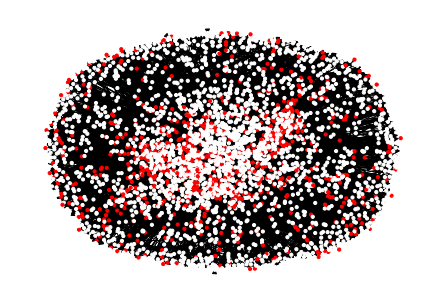

In [ ]:
colored = []
for nodes in G_sampled.nodes():
    if nodes in activated_nodes:
        colored.append('red')
    else:
        colored.append('white')
nx.draw(G_sampled, with_labels = False, node_size= 10 , node_color = colored)


## Community Detection
on Facebook (Social Circles) Dataset Sample

In [ ]:
import pandas as pd
import random
import numpy as np
import networkx as nx
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import random
import copy
%matplotlib inline

### Clique Percolation Method

In [ ]:
G = G_sampled

from collections import defaultdict
def get_percolated_cliques(G, k):
	perc_graph = nx.Graph()
	cliques = [frozenset(c) for c in nx.find_cliques(G) if len(c) >= k]
	perc_graph.add_nodes_from(cliques)

	# First index which nodes are in which cliques
	membership_dict = defaultdict(list)
	for clique in cliques:
		for node in clique:
			membership_dict[node].append(clique)

	# For each clique, see which adjacent cliques percolate
	for clique in cliques:
		for adj_clique in get_adjacent_cliques(clique, membership_dict):
			if len(clique.intersection(adj_clique)) >= (k - 1):
				perc_graph.add_edge(clique, adj_clique)

	# Connected components of clique graph with perc edges
	# are the percolated cliques
	for component in nx.connected_components(perc_graph):
		yield(frozenset.union(*component))

def get_adjacent_cliques(clique, membership_dict):
	adjacent_cliques = set()
	for n in clique:
		for adj_clique in membership_dict[n]:
			if clique != adj_clique:
				adjacent_cliques.add(adj_clique)
	return adjacent_cliques


print("")
results = get_percolated_cliques(G , 4)
# nx.draw_networkx(results)

The clique percolation method is a popular approach for analyzing the overlapping community structure of networks. The term network community (also called a module, cluster or cohesive group) has no widely accepted unique definition and it is usually defined as a group of nodes that are more densely connected to each other than to other nodes in the network. There are numerous alternative methods for detecting communities in networks, for example, the Girvan–Newman algorithm, hierarchical clustering and modularity maximization.

Next we will be implementing Girvan–Newman algorithm (a hierarchical method used to detect communities)

In [ ]:
all_degrees = []
normalized_degrees = []
def plot(list_values,xlabel,ylabel,title):
  unique_degrees = list(sorted(set(list_values)))
  count_of_degrees = []
  for i in unique_degrees:
    x = all_degrees.count(i)
    count_of_degrees.append(x)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.plot(unique_degrees,count_of_degrees)
  plt.show()

In [ ]:
G = nx.read_edgelist('/content/drive/My Drive/Colab Notebooks/Dataset/facebook_combined_Sample.txt', nodetype=int, create_using=nx.DiGraph())

In [ ]:
def draw(G, pos, measures, measure_name):
  nodes = nx.draw_networkx_nodes(G, pos, cmap=plt.cm.plasma, node_color=list(measures.values()), nodelist=list(measures.keys()))
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  edges = nx.draw_networkx_edges(G, pos)
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

Community detection aims to identify highly connected groups of individuals or objects in-
side these networks, these groups are called communities. FINDING MOST VALUABLE EDGE
USING EGDE BETWEENESS CENTRALITY AND GIRAN_NEWMAN Function that takes a
graph as input and outputs an edge To get only the first 3 tuples of communities, We used iter-
tools.islice():

In [ ]:
from networkx import edge_betweenness_centrality
from random import random
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
def most_valuable_edge(G):
  centrality = edge_betweenness_centrality(G)
  max_cent = max(centrality.values())
  # Scale the centrality values so they are between 0 and 1,
  # and add some random noise.
  centrality = {e: c / max_cent for e, c in centrality.items()}
  # Add some random noise.
  centrality = {e: c + random() for e, c in centrality.items()}
  return max(centrality, key=centrality.get)
gn_generator = girvan_newman(G, most_valuable_edge)
from itertools import islice
gn_communities = next(islice(gn_generator, 3, None)) # Do 3 iterations only

In [ ]:
gn_dict_communities = {}
for i, c in enumerate(gn_communities):
  for node in c:
    gn_dict_communities[node] = i + 1
for node in G:
  if node not in gn_dict_communities.keys():
    gn_dict_communities[node] = -1

We Positioned the communities with respect to each other: create a new, weighted graph,
where each node corresponds to a community, and the weights correspond to the number
of edges between communities. WE Got a decent layout with our spring_layout.
2) We Positioned the nodes within each community: for each community, create a new
graph.We Find a layout for the subgraph.
3) Combine node positions in 1) and 3). E.g. scale community positions calculated in 1) by a
factor of 10; add those values to the positions of all nodes (as computed in 2)) within that
community.

In [ ]:
#girvan Newman
def community_layout(g, partition):
  pos_communities = _position_communities(g, partition, scale=3.)
  pos_nodes = _position_nodes(g, partition, scale=1.)
# combine positions
  pos = dict()
  for node in g.nodes():
    pos[node] = pos_communities[node] + pos_nodes[node]
  return pos
def _position_communities(g, partition, **kwargs):
# create a weighted graph, in which each node corresponds to a community,
# and each edge weight to the number of edges between communities
  between_community_edges = _find_between_community_edges(g, partition)
  communities = set(partition.values())
  hypergraph = nx.DiGraph()
  hypergraph.add_nodes_from(communities)
  for (ci, cj), edges in between_community_edges.items():
    hypergraph.add_edge(ci, cj, weight=len(edges))
# find layout for communities
  pos_communities = nx.spring_layout(hypergraph, **kwargs)
# set node positions to position of community
  pos = dict()
  for node, community in partition.items():
    pos[node] = pos_communities[community]
  return pos

In [ ]:
def _find_between_community_edges(g, partition):
  edges = dict()
  for (ni, nj) in g.edges():
    ci = partition[ni]
    cj = partition[nj]
    if ci != cj:
      try:
        edges[(ci, cj)] += [(ni, nj)]
      except KeyError:
        edges[(ci, cj)] = [(ni, nj)]
  return edges


def _position_nodes(g, partition, **kwargs):
  communities = dict()
  for node, community in partition.items():
    try:
      communities[community] += [node]
    except KeyError:
      communities[community] = [node]
    pos = dict()
  for ci, nodes in communities.items():
    subgraph = g.subgraph(nodes)
    pos_subgraph = nx.spring_layout(subgraph, **kwargs)
    pos.update(pos_subgraph)
  return pos

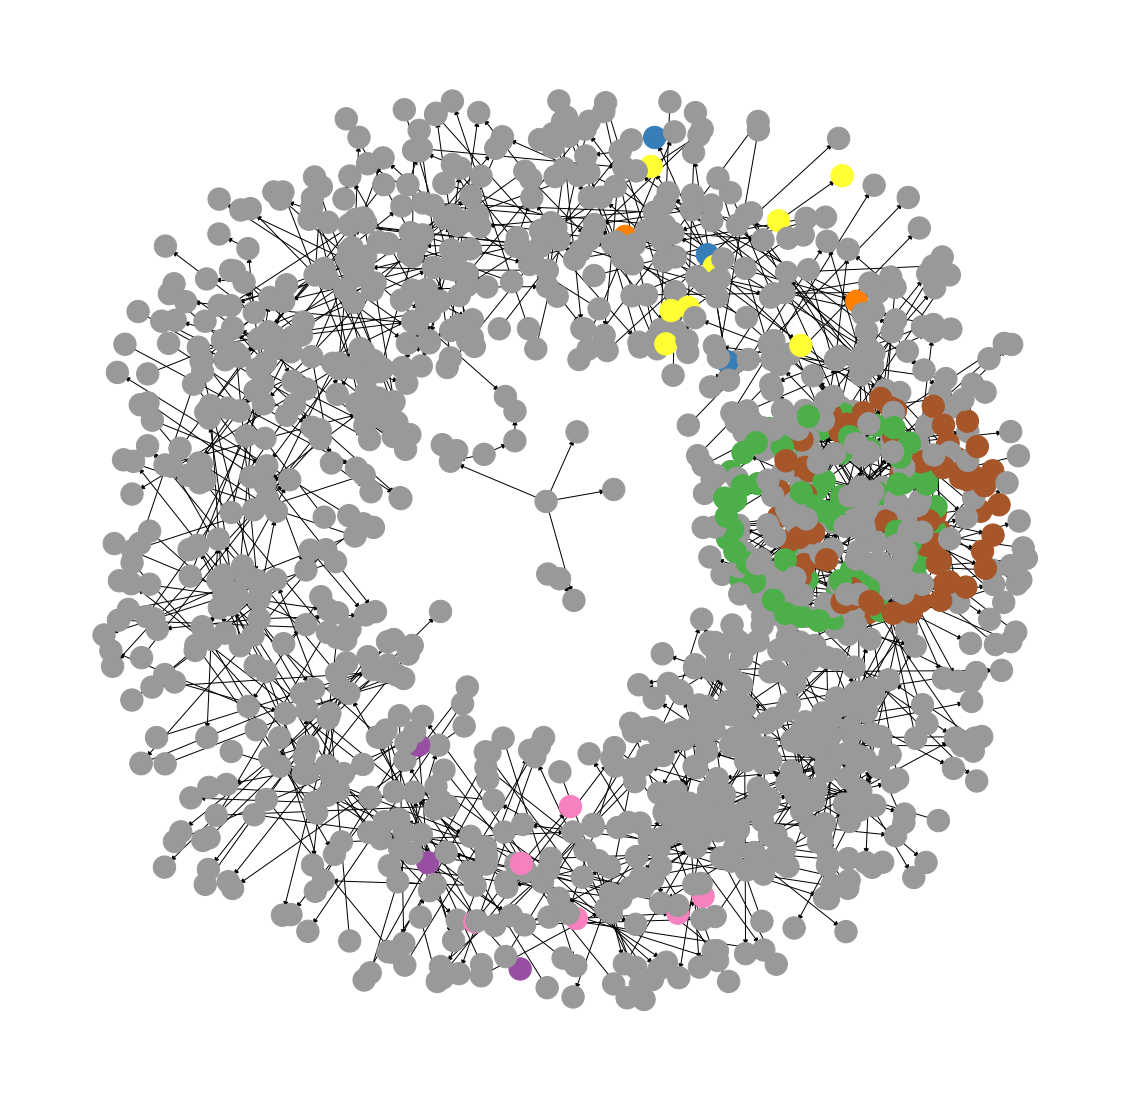

In [ ]:
gn_pos = community_layout(G, gn_dict_communities)
from matplotlib import cm
gn_colors = []
for node in G.nodes:
  gn_colors.append(cm.Set1(gn_dict_communities[node]))
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, gn_pos, node_color=gn_colors, node_size=500)
nx.draw_networkx_edges(G, gn_pos,alpha=1)
plt.axis('off')
plt.show()

In [ ]:
Using above techniques, we have found and predicted the possible communities.